In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
from sklearn.metrics import accuracy_score
import pandas as pd

%matplotlib inline
mpl.style.use('ggplot')
mpl.rcParams['figure.figsize'] = [10,6]


In [2]:
np.random.seed =42
class1_mean = np.array([1,1])
class2_mean = np.array([-2,-1])

class1 = 0.5 * np.random.randn(100,2)+ class1_mean
class2 = 0.5 * np.random.randn(100,2)+ class2_mean

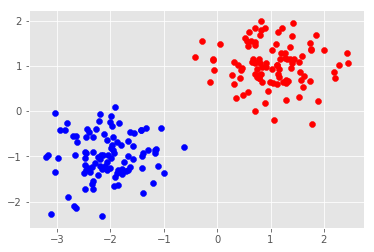

In [3]:
fig,ax = plt.subplots()
ax.scatter(class1[:,0],class1[:,1],c='r')
ax.scatter(class2[:,0],class2[:,1],c='b')

In [4]:
inds = np.random.permutation(np.arange(200))

In [5]:
x = np.vstack([class1,class2])[inds,:]
y = np.squeeze(np.vstack([-np.ones((100,1)),np.ones((100,1))])[inds])

In [6]:
x.shape

(200, 2)

In [7]:
 class perceptron(object):
        def __init__(self,eta=0.01, n_iter=50, random_state=1):
            self.eta = eta
            self.n_iter = n_iter
            self.random_state = random_state
            
        def fit(self, X, y):
            rgen = np.random.RandomState(self.random_state)
            self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+x.shape[1])
            self.errors = []
            
            for _ in range(self.n_iter):
                errors = 0
                for xi,target in zip(x,y):
                    update = self.eta*(target-self.predict(xi))
                    self.w_[1:] = self.w_[1:] + update*xi
                    self.w_[0] = self.w_[0] + update
                    errors = errors + int(update != 0)
                self.errors.append(errors)    
            return self
        
        def net_input(self,x):
            return np.dot(x,self.w_[1:]) + self.w_[0]
        
        def predict(self,x):
            return np.where(self.net_input(x)>=0,1,-1)

In [8]:
model = perceptron()


In [9]:
model = model.fit(x,y)

In [10]:
y_hat = model.predict(x)

In [11]:
accuracy_score(y,y_hat)

1.0

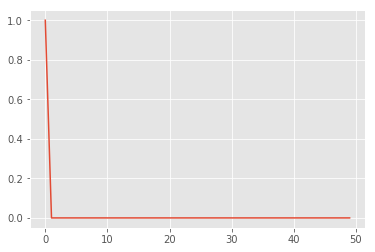

In [12]:
fig,ax = plt.subplots()
ax.plot(range(len(model.errors)),model.errors)

In [13]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

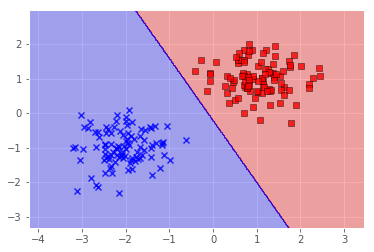

In [14]:
plot_decision_regions(x, y, model, resolution=0.02)

In [15]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)

In [16]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
x = df.values[:,:-1]

In [18]:
y = (2*df[4].str.match("Iris-setosa").astype(float) -1)
y = y.values


In [19]:
iris_model = perceptron()
iris_model = iris_model.fit(x,y)
y_hat = iris_model.predict(x)

In [20]:
accuracy_score(y,y_hat)

1.0